In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Chargement données simus

In [49]:
raw_data <- read.csv(file = "simu_serveur/data_output_simu_model2.csv", sep=";", header=TRUE)

In [50]:
raw_data <- data.frame(apply(raw_data, 2, function(x) as.numeric(gsub(",", "\\.", x))))


In [70]:
colnames(raw_data)
(raw_data)

[1] "birth_rate"    "compet"        "a"             "t0"           
  [5] "k"             "compet2"       "n_immig"       "n_alive_0"    
  [9] "n_alive_1"     "n_alive_2"     "n_alive_3"     "n_alive_4"    
 [13] "n_alive_5"     "n_alive_6"     "n_alive_7"     "n_alive_8"    
 [17] "n_alive_9"     "n_alive_10"    "n_alive_11"    "n_alive_12"   
 [21] "n_alive_13"    "n_alive_14"    "n_alive_15"    "n_alive_16"   
 [25] "n_alive_17"    "n_alive_18"    "n_alive_19"    "n_alive_20"   
 [29] "n_alive_21"    "n_alive_22"    "n_alive_23"    "n_alive_24"   
 [33] "n_alive_25"    "n_alive_26"    "n_alive_27"    "n_alive_28"   
 [37] "n_alive_29"    "n_alive_30"    "n_alive_31"    "n_alive_32"   
 [41] "n_alive_33"    "n_alive_34"    "n_alive_35"    "n_alive_36"   
 [45] "n_alive_37"    "n_alive_38"    "n_alive_39"    "n_alive_40"   
 [49] "n_alive_41"    "n_alive_42"    "n_alive_43"    "n_alive_44"   
 [53] "n_alive_45"    "n_alive_46"    "n_alive_47"    "n_alive_48"   
 [57] "n_alive_49"    "smurf_rate_0"  "smurf_rate_1"  "smurf_rate_2" 
 [61] "smurf_rate_3"  "smurf_rate_4"  "smurf_rate_5"  "smurf_rate_6" 
 [65] "smurf_rate_7"  "smurf_rate_8"  "smurf_rate_9"  "smurf_rate_10"
 [69] "smurf_rate_11" "smurf_rate_12" "smurf_rate_13" "smurf_rate_14"
 [73] "smurf_rate_15" "smurf_rate_16" "smurf_rate_17" "smurf_rate_18"
 [77] "smurf_rate_19" "smurf_rate_20" "smurf_rate_21" "smurf_rate_22"
 [81] "smurf_rate_23" "smurf_rate_24" "smurf_rate_25" "smurf_rate_26"
 [85] "smurf_rate_27" "smurf_rate_28" "smurf_rate_29" "smurf_rate_30"
 [89] "smurf_rate_31" "smurf_rate_32" "smurf_rate_33" "smurf_rate_34"
 [93] "smurf_rate_35" "smurf_rate_36" "smurf_rate_37" "smurf_rate_38"
 [97] "smurf_rate_39" "smurf_rate_40" "smurf_rate_41" "smurf_rate_42"
[101] "smurf_rate_43" "smurf_rate_44" "smurf_rate_45" "smurf_rate_46"
[105] "smurf_rate_47" "smurf_rate_48" "smurf_rate_49" "age_0_smurf0" 
[109] "age_1_smurf0"  "age_2_smurf0"  "age_3_smurf0"  "age_4_smurf0" 
[113] "age_5_smurf0"  "age_6_smurf0"  "age_7_smurf0"  "age_8_smurf0" 
[117] "age_9_smurf0"  "age_10_smurf0" "age_11_smurf0" "age_12_smurf0"
[121] "age_13_smurf0" "age_14_smurf0" "age_15_smurf0" "age_16_smurf0"
[125] "age_17_smurf0" "age_18_smurf0" "age_19_smurf0" "age_20_smurf0"
[129] "age_21_smurf0" "age_22_smurf0" "age_23_smurf0" "age_24_smurf0"
[133] "age_25_smurf0" "age_26_smurf0" "age_27_smurf0" "age_28_smurf0"
[137] "age_29_smurf0" "age_0_smurf1"  "age_1_smurf1"  "age_2_smurf1" 
[141] "age_3_smurf1"  "age_4_smurf1"  "age_5_smurf1"  "age_6_smurf1" 
[145] "age_7_smurf1"  "age_8_smurf1"  "age_9_smurf1"  "age_10_smurf1"
[149] "age_11_smurf1" "age_12_smurf1" "age_13_smurf1" "age_14_smurf1"
[153] "age_15_smurf1" "age_16_smurf1" "age_17_smurf1" "age_18_smurf1"
[157] "age_19_smurf1" "age_20_smurf1" "age_21_smurf1" "age_22_smurf1"
[161] "age_23_smurf1" "age_24_smurf1" "age_25_smurf1" "age_26_smurf1"
[165] "age_27_smurf1" "age_28_smurf1" "age_29_smurf1"

birth_rate,compet,a,t0,k,compet2,n_immig,n_alive_0,n_alive_1,n_alive_2,⋯,age_20_smurf1,age_21_smurf1,age_22_smurf1,age_23_smurf1,age_24_smurf1,age_25_smurf1,age_26_smurf1,age_27_smurf1,age_28_smurf1,age_29_smurf1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1,1.0e-04,0.009,5,0.1911,1e-06,9,10,24,32,⋯,6,7,1,3,2,2,2,1,5,1
0.1,1.0e-04,0.009,5,0.1911,1e-07,9,11,23,36,⋯,5,1,3,4,4,4,3,5,1,2
38.0,4.3e+01,36.000,30,14.0000,2e+01,20,16,6,8,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0.3,1.0e-04,0.009,5,0.1911,1e-06,9,11,24,38,⋯,0,0,0,1,0,0,0,0,0,0
0.2,1.0e-05,0.009,5,0.1911,1e-06,9,7,17,34,⋯,25,21,18,7,6,4,4,4,3,2
0.3,1.0e-04,0.009,5,0.1911,1e-07,9,8,23,32,⋯,0,0,0,0,0,1,0,0,0,0
0.2,1.0e-05,0.009,5,0.1911,1e-07,9,15,25,41,⋯,17,13,11,9,8,12,12,3,3,1
0.2,1.0e-06,0.009,5,0.1911,1e-06,9,7,16,34,⋯,179,128,77,66,56,37,36,30,18,16
0.3,1.0e-05,0.009,5,0.1911,1e-07,9,6,18,31,⋯,4,5,2,1,2,0,1,1,1,0


# Plots

In [52]:
data <- raw_data %>%
  select(-starts_with("age"))

In [53]:
long_data <- data %>%
  pivot_longer(cols = starts_with("n_alive_") | starts_with("smurf_rate_"),
               names_to = "variable",
               values_to = "value") %>%  separate(variable, into = c("measure", "time"), sep = "_rate_|_alive_") 
long_data$time <- as.numeric(long_data$time)
head(long_data)
dim(long_data)

birth_rate,compet,a,t0,k,compet2,n_immig,measure,time,value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
0.1,1e-04,0.009,5,0.1911,1e-06,9,n,0,10
0.1,1e-04,0.009,5,0.1911,1e-06,9,n,1,24
0.1,1e-04,0.009,5,0.1911,1e-06,9,n,2,32
0.1,1e-04,0.009,5,0.1911,1e-06,9,n,3,48
0.1,1e-04,0.009,5,0.1911,1e-06,9,n,4,57
0.1,1e-04,0.009,5,0.1911,1e-06,9,n,5,69


[1] 1700   10

In [73]:
subset_data <- long_data %>%
  filter(compet == 1e-5,compet2==1e-6, measure=='n')

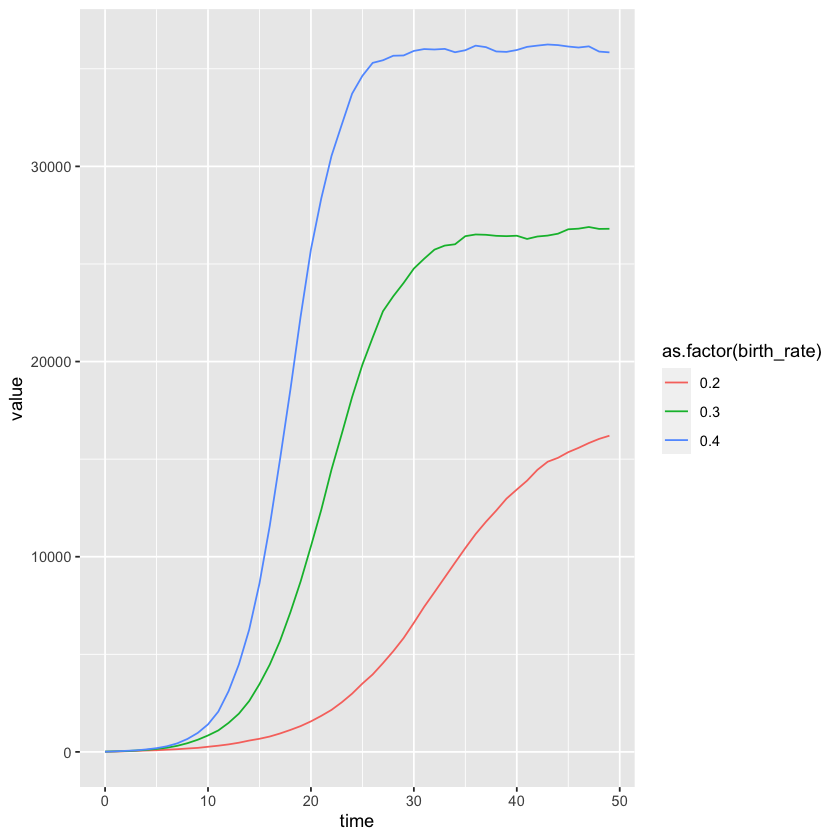

In [74]:
ggplot(subset_data, aes(x = time, y = value, group=birth_rate, color=as.factor(birth_rate)))+ geom_line()

In [75]:
subset_data <- long_data %>%
  filter(compet == 1e-5,compet2==1e-6, measure=='smurf')

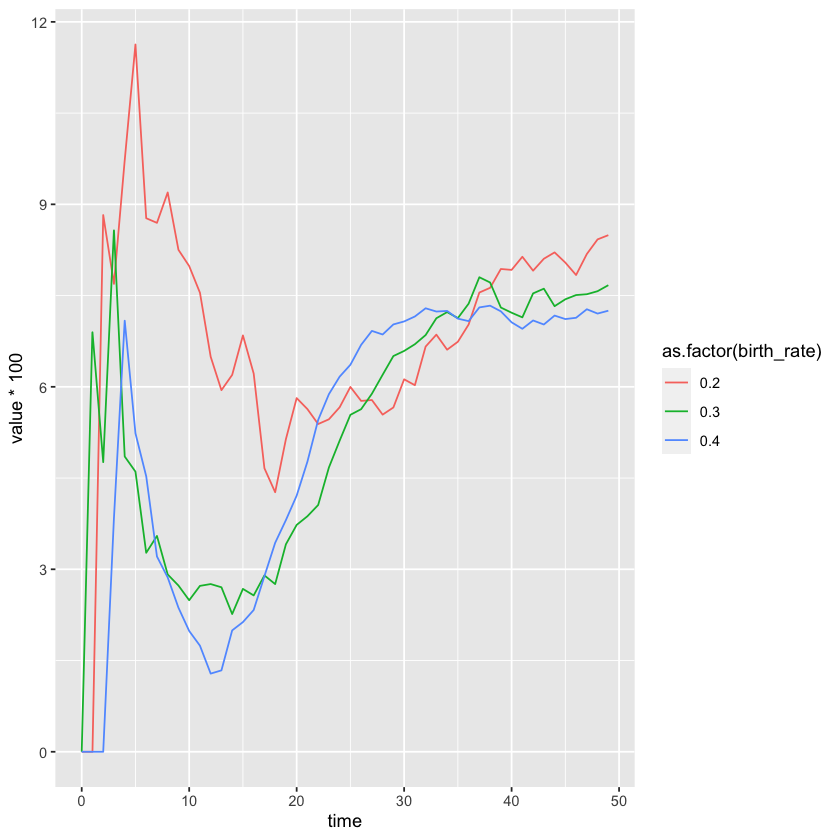

In [76]:
ggplot(subset_data, aes(x = time, y = value*100, group=birth_rate, color=as.factor(birth_rate)))+ geom_line()